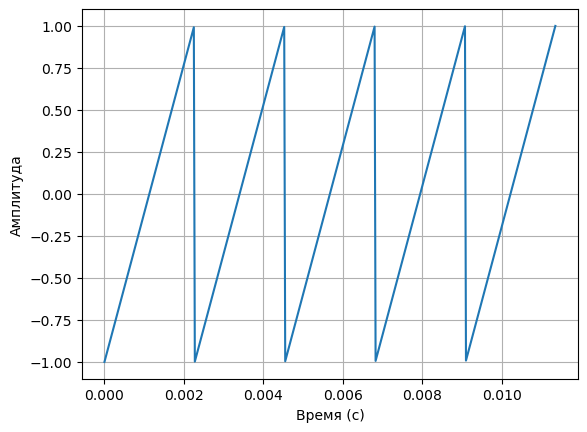

In [1]:
# Загрузка thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import Sinusoid, normalize, unbias, plt, TriangleSignal, SquareSignal, SinSignal, SawtoothSignal, CosSignal, ParabolicSignal
import numpy as np

class SawtoothSignal(Sinusoid):
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

sample_signal = SawtoothSignal()
test_wave = sample_signal.make_wave(sample_signal.period * 5, framerate=40000)
test_wave.plot()
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

saw_audio = SawtoothSignal().make_wave(duration=0.5, framerate=40000)
saw_audio.make_audio()

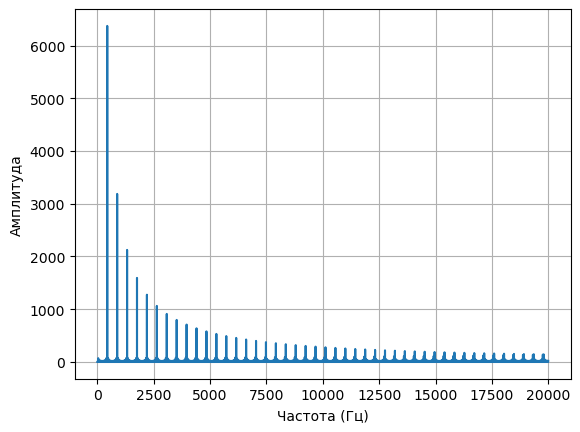

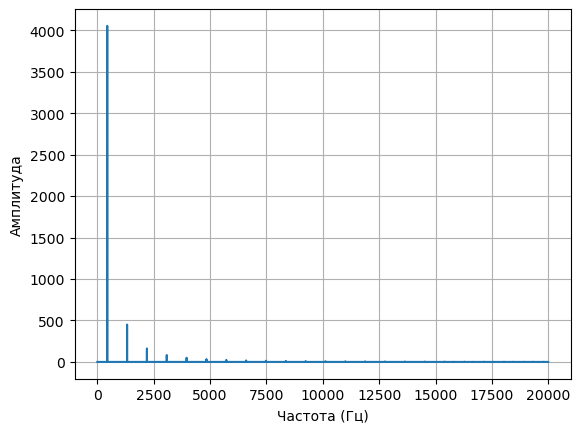

In [2]:
freq_analysis = saw_audio.make_spectrum()
freq_analysis.plot()
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()

triangle_audio = TriangleSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
freq_analysis_triangle = triangle_audio.make_spectrum()
freq_analysis_triangle.plot()
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()
triangle_audio.make_audio()

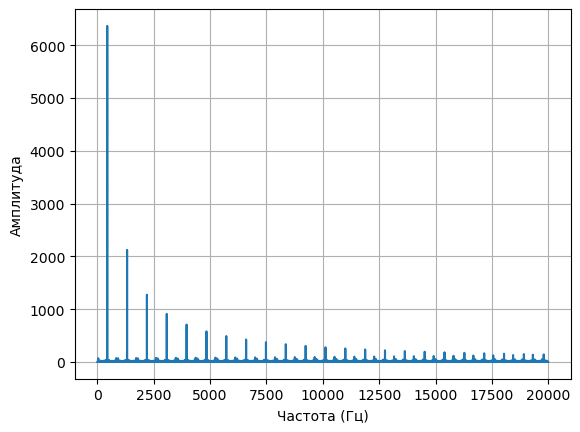

In [3]:
square_audio = SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=40000)
freq_analysis_square = square_audio.make_spectrum()
freq_analysis_square.plot()
plt.xlabel('Частота (Гц)')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.show()
square_audio.make_audio()

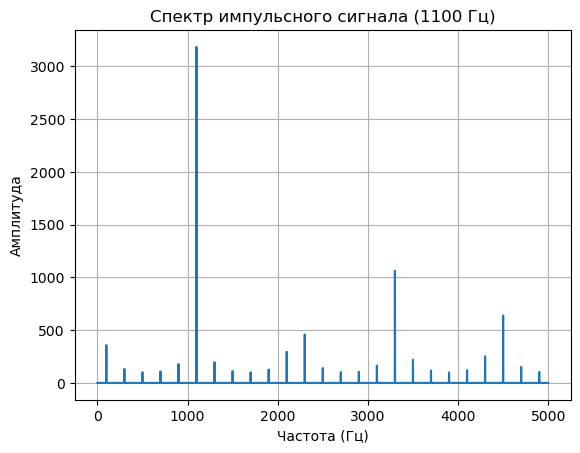

In [4]:
pulse_signal = SquareSignal(freq=1100)
audio_one = pulse_signal.make_wave(duration=0.5, framerate=10000)
spectrum_one = audio_one.make_spectrum()
spectrum_one.plot()
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.title("Спектр импульсного сигнала (1100 Гц)")
plt.grid(True)
plt.show()
audio_one.make_audio()

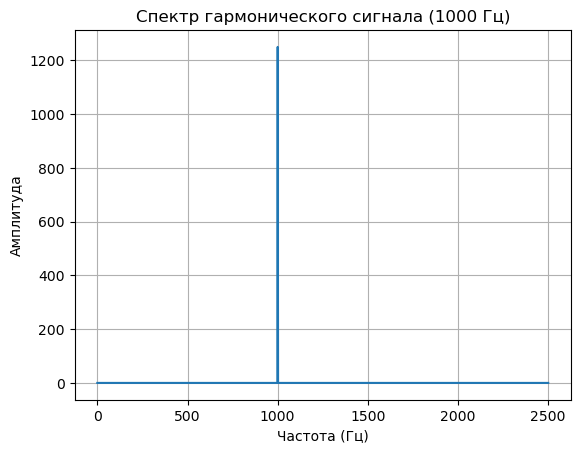

In [5]:
harmonic_signal = SinSignal(freq=1000)
audio_two = harmonic_signal.make_wave(duration=0.5, framerate=5000)
spectrum_two = audio_two.make_spectrum()
spectrum_two.plot()
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.title("Спектр гармонического сигнала (1000 Гц)")
plt.grid(True)
plt.show()
audio_two.make_audio()

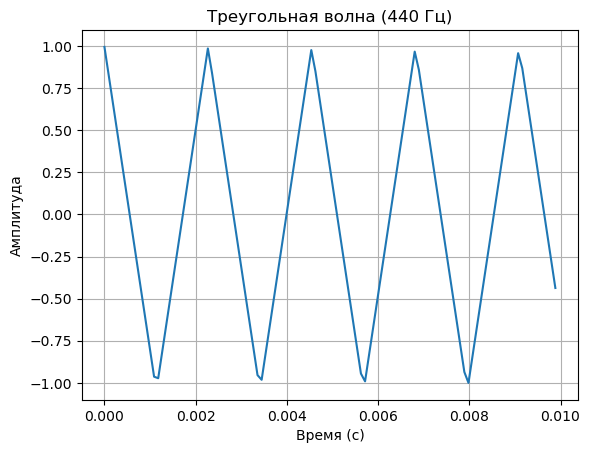

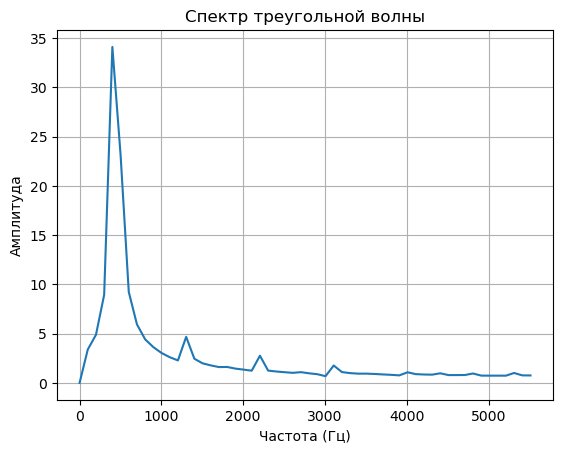

Амплитуда компоненты с частотой 0 Гц: (1.0436096431476471e-14+0j)


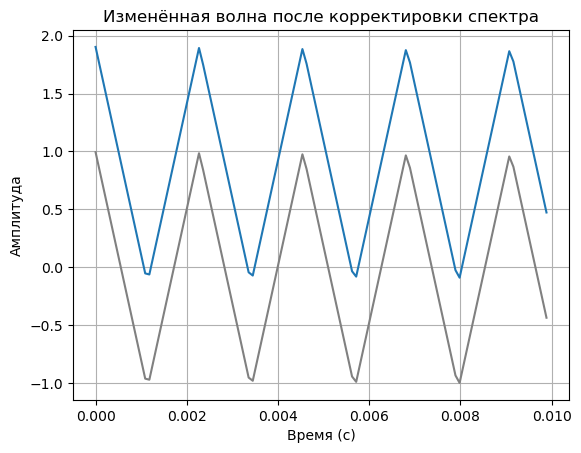

In [6]:
tri_wave = TriangleSignal(freq=440)
signal_wave = tri_wave.make_wave(duration=0.01)
signal_wave.plot()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Треугольная волна (440 Гц)")
plt.grid(True)
plt.show()
freq_content = signal_wave.make_spectrum()
freq_content.plot()
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.title("Спектр треугольной волны")
plt.grid(True)
plt.show()
print("Амплитуда компоненты с частотой 0 Гц:", freq_content.hs[0])
freq_content.hs[0] = 100
signal_wave.plot(color='gray')
new_signal = freq_content.make_wave()
new_signal.plot()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Изменённая волна после корректировки спектра")
plt.grid(True)
plt.show()

def adjust_spectrum(freq_data):
    active_freqs = freq_data.fs[1:]
    freq_data.hs[1:] /= active_freqs
    freq_data.hs[0] = 0

rect_wave = SquareSignal(440).make_wave(duration=0.5)
rect_wave.make_audio()

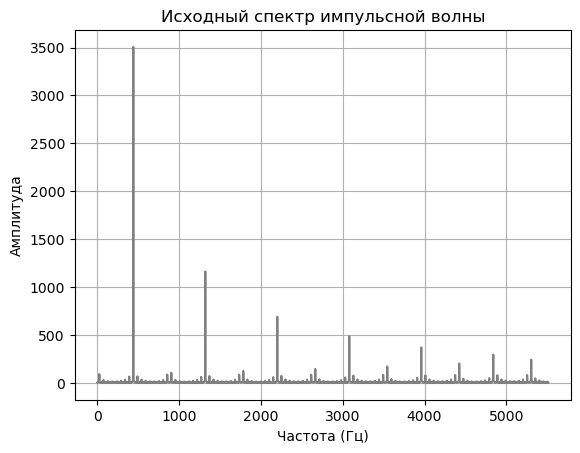

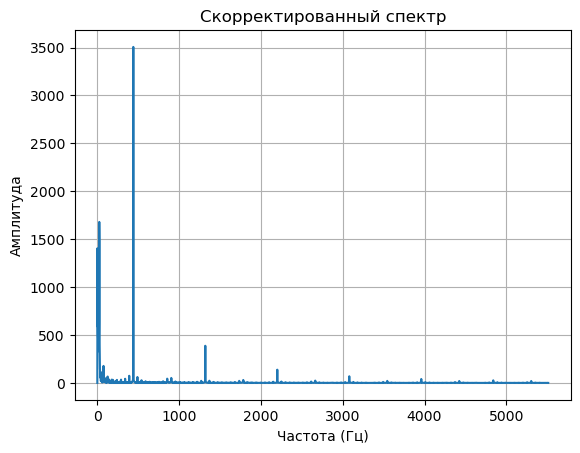

In [7]:
freq_data = rect_wave.make_spectrum()
freq_data.plot(high=10000, color='gray')
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.title("Исходный спектр импульсной волны")
plt.grid(True)
plt.show()
adjust_spectrum(freq_data)
freq_data.scale(440)
freq_data.plot(high=10000)
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.title("Скорректированный спектр")
plt.grid(True)
plt.show()
filtered_audio = freq_data.make_wave()
filtered_audio.make_audio()

In [8]:
base_freq = 500
saw_pattern = SawtoothSignal(freq=base_freq)
saw_audio = saw_pattern.make_wave(duration=0.5, framerate=20000)
saw_audio.make_audio()

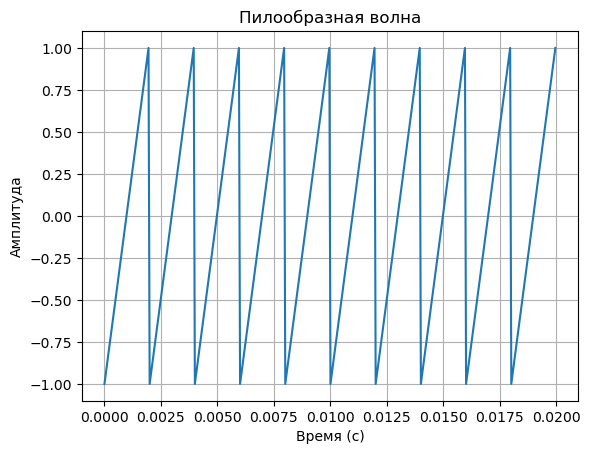

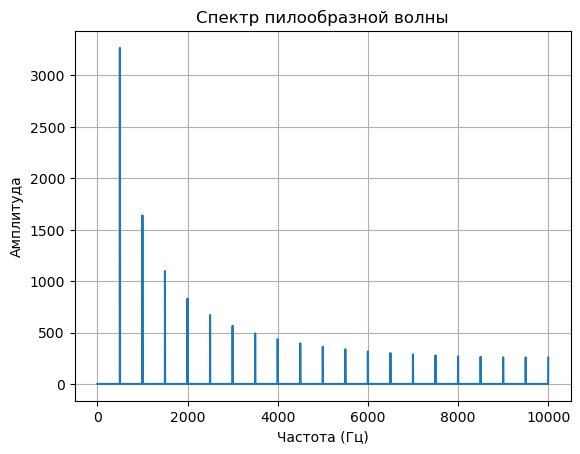

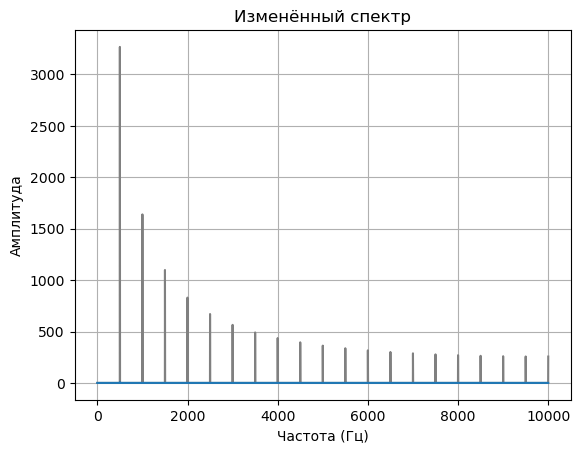

In [9]:
wave_section = saw_pattern.make_wave(duration=saw_pattern.period * 10, framerate=20000)
wave_section.plot()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Пилообразная волна")
plt.grid(True)
plt.show()
freq_profile = saw_audio.make_spectrum()
freq_profile.plot()
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.title("Спектр пилообразной волны")
plt.grid(True)
plt.show()
freq_profile.plot(color='gray')

def adjust_spectrum(freq_data):
    active_freqs = freq_data.fs[1:]  
    freq_data.hs[1:] /= active_freqs ** 2
    freq_data.hs[0] = 0  

adjust_spectrum(freq_profile)
freq_profile.scale(base_freq)
freq_profile.plot()
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.title("Изменённый спектр")
plt.grid(True)
plt.show()
modified_audio = freq_profile.make_wave()
modified_audio.make_audio()

In [10]:
harmonic_freqs = np.arange(500, 9500, 500)
harmonic_amps = 1 / harmonic_freqs**2
combined_signal = sum(CosSignal(freq, amp) for freq, amp in zip(harmonic_freqs, harmonic_amps))
combined_audio = combined_signal.make_wave(duration=0.5, framerate=20000)
combined_audio.make_audio()

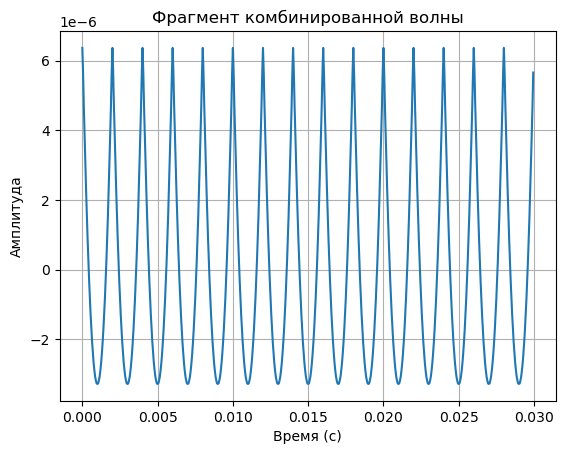

In [11]:
combined_audio.segment(duration=0.03).plot()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Фрагмент комбинированной волны")
plt.grid(True)
plt.show()

parabolic_audio = ParabolicSignal(freq=500).make_wave(duration=0.5, framerate=20000)
parabolic_audio.make_audio()

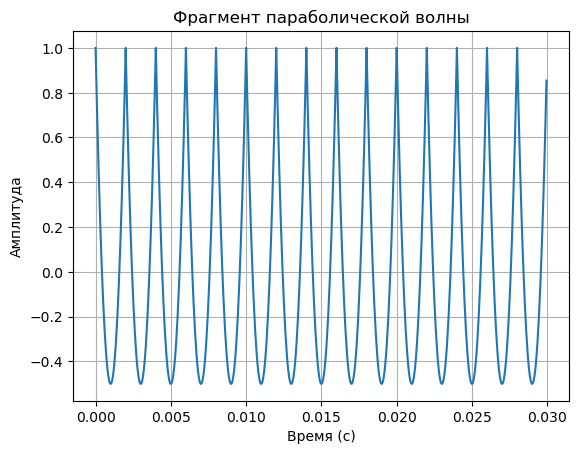

In [12]:
parabolic_audio.segment(duration=0.03).plot()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Фрагмент параболической волны")
plt.grid(True)
plt.show()